In [ ]:
!pip uninstall numpy scipy gensim -y
!pip install numpy==1.23.5 scipy==1.11.4 gensim==4.3.1

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all 

In [ ]:
! pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown
from nltk import download
download('brown')
download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = brown.sents()
CBOWModel = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0)
skipGramModel = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

In [ ]:
similar_wordsCBOW = CBOWModel.wv.most_similar("government", topn=5)
for word, similarity in similar_wordsCBOW:
    print(f"{word}: {similarity:.2f}")

print("-" * 30)

similar_words_skip_gram = skipGramModel.wv.most_similar("government", topn=5)
for word, similarity in similar_words_skip_gram:
    print(f"{word}: {similarity:.2f}")

training: 0.95
power: 0.95
nation: 0.95
policy: 0.95
growth: 0.94
------------------------------
federal: 0.90
welfare: 0.89
financial: 0.88
governments: 0.88
trade: 0.88


<ipython-input-5-2b3e0ac74a46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_cbow, y=words_cbow, palette="Blues_d")


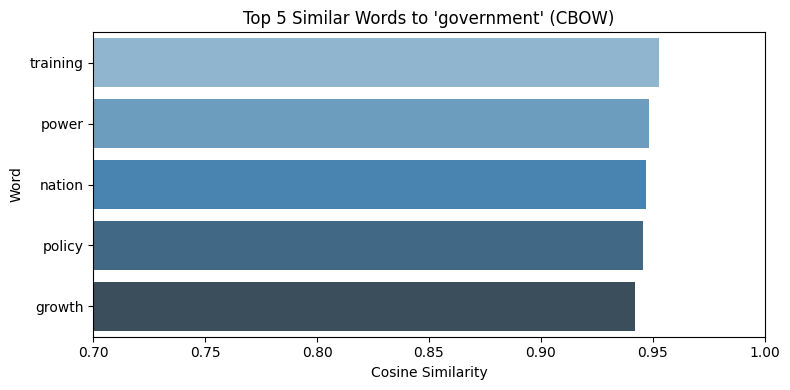

<ipython-input-5-2b3e0ac74a46>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_skip, y=words_skip, palette="Greens_d")


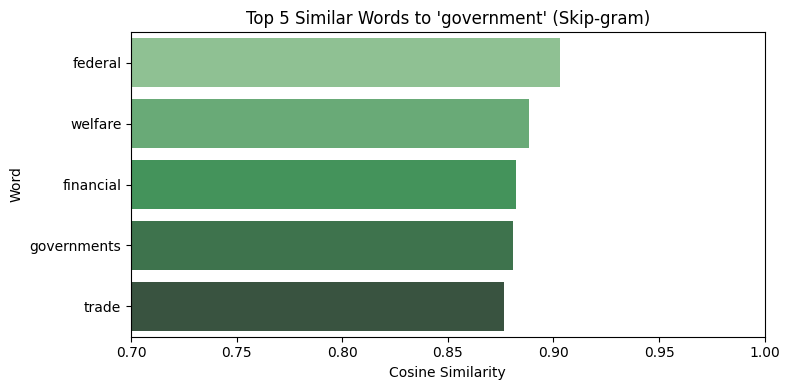

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

words_cbow, scores_cbow = zip(*similar_wordsCBOW)
plt.figure(figsize=(8, 4))
sns.barplot(x=scores_cbow, y=words_cbow, palette="Blues_d")
plt.title("Top 5 Similar Words to 'government' (CBOW)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Word")
plt.xlim(0.7, 1.0)
plt.tight_layout()
plt.show()


words_skip, scores_skip = zip(*similar_words_skip_gram)
plt.figure(figsize=(8, 4))
sns.barplot(x=scores_skip, y=words_skip, palette="Greens_d")
plt.title("Top 5 Similar Words to 'government' (Skip-gram)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Word")
plt.xlim(0.7, 1.0)
plt.tight_layout()
plt.show()

[-0.35727605 -0.05585162  0.19305612  0.31098217 -0.01277471 -0.83202505
  0.31352147  0.71087015 -0.5264742  -0.33025888]
[-0.20146666 -0.22521171  0.43353468  0.21800117  0.36127818 -0.34590507
  0.5308675   0.24402452 -0.44111234 -0.545187  ]


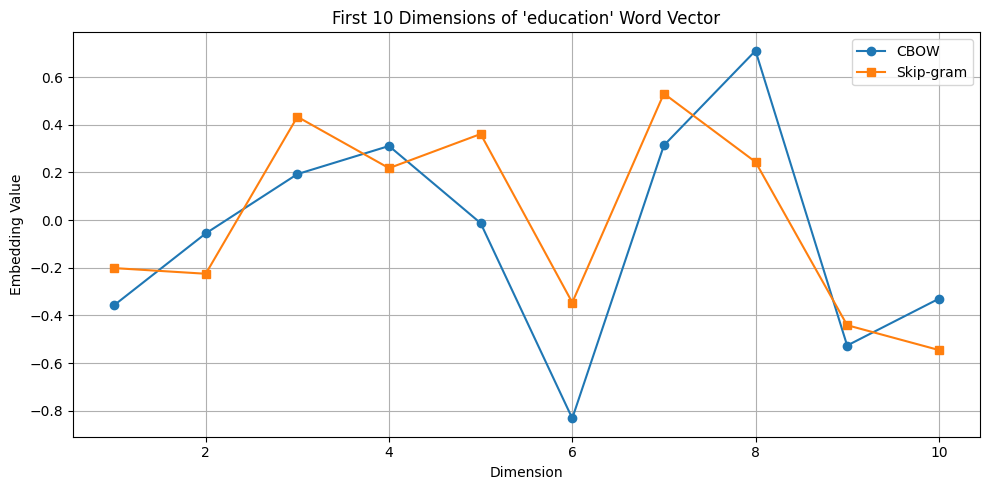

In [ ]:
import numpy as np
vectorCBOW = CBOWModel.wv["education"]
print(vectorCBOW[:10])

vectorSkipGram = skipGramModel.wv["education"]
print(vectorSkipGram[:10])




dims = np.arange(1, 11)

plt.figure(figsize=(10, 5))
plt.plot(dims, vectorCBOW[:10], label='CBOW', marker='o')
plt.plot(dims, vectorSkipGram[:10], label='Skip-gram', marker='s')
plt.title("First 10 Dimensions of 'education' Word Vector")
plt.xlabel("Dimension")
plt.ylabel("Embedding Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()